In [1]:
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import models, layers, losses, regularizers, optimizers

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

In [3]:
tokenizer = Tokenizer(num_words=1000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

In [4]:
model = models.Sequential()
model.add(
    layers.Dense(
        8,
        activation='relu',
        input_shape=(1000,),
        name='input'))
model.add(
    layers.Dense(
        8,
        activation='relu',
        name='dense_1'))
model.add(
    layers.Dense(
        1,
        activation='sigmoid',
        name='classification'))
model.compile(optimizer=optimizers.Adam(),
            loss=losses.BinaryCrossentropy(),
            metrics=['acc'])

history=model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 0.3929 - acc: 0.8243 - val_loss: 0.3374 - val_acc: 0.8550
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3177 - acc: 0.8677 - val_loss: 0.3255 - val_acc: 0.8608
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3063 - acc: 0.8704 - val_loss: 0.3242 - val_acc: 0.8585
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2975 - acc: 0.8728 - val_loss: 0.3235 - val_acc: 0.8596
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2889 - acc: 0.8772 - val_loss: 0.3250 - val_acc: 0.8572
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2818 - acc: 0.8791 - val_loss: 0.3258 - val_acc: 0.8578
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 0.2727 - acc: 0.8838 - val_loss: 0.3349 - val_acc: 0.8560
Epoch 8/10
782/782 [==============================] - 7s 8ms/step - loss: 0

In [5]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(
            8,
            activation='relu',
            input_shape=(1000,),
            name='input'))
model_reg.add(layers.Dense(
            8,
            activation='relu',
            kernel_regularizer=regularizers.l2(0.001),
            name='dense_1'))
model_reg.add(layers.Dropout(
    0.5,
    name='dropout_1'))
model_reg.add(
    layers.Dense(
        1,
        activation='sigmoid',
        name='classification'))
model_reg.compile(optimizer=optimizers.Adam(),
            loss=losses.BinaryCrossentropy(),
            metrics=['acc'])

history_reg = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2336 - acc: 0.9015 - val_loss: 0.3705 - val_acc: 0.8500
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2244 - acc: 0.9051 - val_loss: 0.3765 - val_acc: 0.8477
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2153 - acc: 0.9088 - val_loss: 0.3898 - val_acc: 0.8418
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2067 - acc: 0.9128 - val_loss: 0.4169 - val_acc: 0.8392
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1982 - acc: 0.9177 - val_loss: 0.4213 - val_acc: 0.8363
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1891 - acc: 0.9211 - val_loss: 0.4428 - val_acc: 0.8361
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1810 - acc: 0.9258 - val_loss: 0.4627 - val_acc: 0.8360
Epoch 8/10
782/782 [==============================] - 7s 9ms/step - loss: 0.

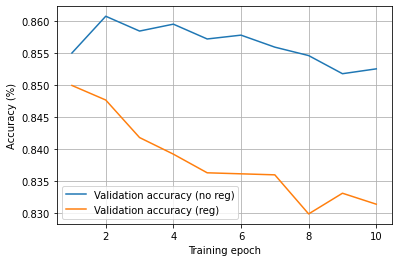

In [6]:
plt.plot(
    range(1, 11),
    history.history['val_acc'],
    label='Validation accuracy (no reg)')
plt.plot(
    range(1, 11),
    history_reg.history['val_acc'],
    label='Validation accuracy (reg)')
plt.legend()
plt.grid()
plt.xlabel('Training epoch')
plt.ylabel('Accuracy (%)')
plt.show()